# Práctica 2: Procesamiento del Lenguaje Natural

__Fecha de entrega: 17 de abril de 2022__

El objetivo de esta práctica es aplicar los conceptos teóricos vistos en clase en el módulo de PLN. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [1]:
RANDOM_STATE = 42

# Apartado 2: Recuperación de información

__Número de grupo: 2__

__Nombres de los estudiantes: Enrique Rey Gisbert, Alberto Almagro Sánchez y Juan Carlos Llamas Núñez__

## 1) Carga del conjunto de datos

El fichero `BBC News.csv` contiene noticias clasificadas en 5 categorías diferentes. 

Carga los datos en un dataframe teniendo en cuenta que la columna `ArticleId` es un identificador de la noticia y por lo tanto no lo vamos a usar. 

Estudia el tamaño del conjunto de datos y la proporción de noticias que pertenecen a cada una de las categorías.

Crea una partición estratificada de los datos dejando el 80% para entrenamiento y el 20% restante para test usando la función `train_test_split` de sklearn. 

Empezamos, al igual que en la práctica anterior, cargando el dataframe con los datos del fichero BBC_News.csv y mostrando el tamaño del conjunto de datos y la proporción de noticias de cada categoría. Al ser igual el dataset que en la practica anterior, nos remitimos a ella para el análisis del mismo.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('BBC News.csv')
df

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


Observamos que hay 1489 artículos, lo cual ya comentamos que es una cantidad aceptable para poder analizar los modelos entrenando los clasificadores.

In [4]:
df['Category'].value_counts() / df['Category'].count() * 100

sport            23.221477
business         22.550336
politics         18.389262
entertainment    18.322148
tech             17.516779
Name: Category, dtype: float64

En la tabla anterior volvemos a notar que tenemos una cantidad equilibrada de noticias de las 5 categorías, rondando el 20% en cada una. 

Creamos por último una partición del conjunto de datos, dejando un 80% para entrenamiento y un 20% para test, utilizando la función train_test_split y barajándolos para ignorar posibles ordenamientos o patrones en los datos iniciales.

In [5]:
train, test = train_test_split(df, test_size=0.2, random_state=RANDOM_STATE, shuffle=True)
train, test

(      ArticleId                                               Text  \
 1166       1682  fuming robinson blasts officials england coach...   
 1106       1950  huge rush for jet airways shares indian airlin...   
 538         623  voters  don t trust politicians  eight out of ...   
 439        1431  dundee utd 4-1 aberdeen dundee united eased in...   
 1478       1144  visa row mandarin made sir john the top civil ...   
 ...         ...                                                ...   
 1130        193  blair  said he would stand down  tony blair pr...   
 1294        111  us trade gap hits record in 2004 the gap betwe...   
 860         833  tories pledge free sports lessons children wou...   
 1459       2206  dance music not dead says fatboy dj norman coo...   
 1126        759  greek pair attend drugs hearing greek sprinter...   
 
            Category  
 1166          sport  
 1106       business  
 538        politics  
 439           sport  
 1478       politics  
 ...    

In [6]:
train['Category'].value_counts() / train['Category'].count() * 100, test['Category'].value_counts() / test['Category'].count() * 100

(sport            23.741611
 business         21.895973
 entertainment    19.043624
 politics         18.288591
 tech             17.030201
 Name: Category, dtype: float64,
 business         25.167785
 sport            21.140940
 tech             19.463087
 politics         18.791946
 entertainment    15.436242
 Name: Category, dtype: float64)

## 2) Representación basada en bolsa de palabras y tf-idf

La primera vectorización que vamos a usar representará los mensajes usando el modelo de bolsa de palabras, monogramas y el valor tf-idf de cada palabra. Usa como _stop words_ las que vienen configuradas por defecto para el inglés.

Aplica la vectorización a los conjuntos de mensajes de entrenamiento y test. Muestra algún mensaje tanto en su formato de texto original como en la versión vectorizada. ¿Qué palabras se han eliminado y por qué?

Calcula la precisión@5 de cada una de las clases usando como consultas los documentos de la partición de test y la similitud del coseno. Vamos a considerar que un documento recuperado es relevante cuando pertenezca a la misma clase que la consulta.

Dibuja los resultados en un diagrama de barras y comenta las clases en las que se comporta mejor y peor. ¿Crees que los resultados son buenos?

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

Empezamos, de igual forma que en la práctica anterior, aplicando la vectorización al conjunto de entrenamiento y al conjunto de test. Podemos ver cómo han quedado los términos y cuántos términos hay utilizando la función get_feature_names() y mostrando train_vector_data una vez hecho el fit_transform con el conjunto de entrenamiento.

In [8]:
vectorizer = CountVectorizer(stop_words='english', binary=False)
train_n = train.loc[:,'Text'].to_numpy()
train_vector_data=vectorizer.fit_transform(train_n)

In [9]:
feature_names = vectorizer.get_feature_names()

print(len(feature_names))
print(feature_names[:5000])

22302
['00', '000', '0001', '000bn', '000m', '000th', '001', '001and', '001st', '0051', '007', '01', '0100', '0130', '028', '03', '033', '0400', '041', '04secs', '05', '050', '050505', '0530', '0530gmt', '056', '05bn', '05m', '06', '0630', '069', '07', '0700', '0710', '072', '0730', '08', '080', '0800', '0845', '0870', '088', '0900', '0950', '09secs', '10', '100', '1000m', '100bn', '100m', '100ml', '101', '102', '103', '104', '105', '105m', '106m', '107', '108', '1080', '109', '109m', '10bn', '10ft', '10m', '10secs', '10th', '11', '110', '1100', '110m', '110th', '111', '112', '113', '1130', '1130p', '113bn', '115', '116', '116i', '117', '117m', '118', '119', '119bn', '119m', '11bn', '11m', '11pm', '11th', '12', '120', '1200', '1200m', '120bn', '120gb', '120m', '121', '1230', '125', '125m', '126', '127th', '128', '129', '12a', '12bn', '12cm', '12m', '12th', '13', '130', '1300', '130m', '132', '133', '1330', '1337', '133m', '134', '135', '136', '137', '137m', '138m', '138p', '139', '13bn

Para ver que términos se han extraido de cada artículo, utilizamos la función write_terms para poder mostrar el texto de un artículo y su versión vectorizada. Realizamos esto con el ejemplo de la práctica anterior.

In [10]:
import numpy as np
import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data is not None:
        print('Mensaje', index, ':', data[index], '\n')
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

In [11]:
write_terms(feature_names, train_n, train_vector_data, 250)

Mensaje 250 : blair to face trust issue head on tony blair says he will be facing the issue of trust and his own integrity head on during the election campaign.  during a question and answer session with first-time voters on five news  mr blair said he had no option but to  confront it  by talking to people. he also dismissed claims government plans to get 50% of young people into university would devalue degrees. he was not  forcing  anyone to go to university  but places should be there for those who wanted them  he said. in answer to a question from 22-year-old liverpool student david dunne about concerns over the prime minister s personal integrity  mr blair said talking was the only answer.  you ve just got to confront it and say to people let s have a discussion on the things that worry you  the things that make you say  i can t trust you  or  i am against you on this.   the  worst thing in politics  was that the electorate only got  little snatches of policy  from things like pr

Por último, como esta vez vamos a utilizar el valor tf-idf de cada palabra, lo calculamos utilizando TfdifTransformer().

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer
 # Calculamos el valor TF-IDF en el conjunto de entrenamiento
tfidfer = TfidfTransformer()
train_preprocessed = tfidfer.fit_transform(train_vector_data)
print(train_preprocessed)

  (0, 22183)	0.020234499185730802
  (0, 22033)	0.03463777083085549
  (0, 22019)	0.06684308646693721
  (0, 21939)	0.0836935429400038
  (0, 21927)	0.06604066597856119
  (0, 21910)	0.06866152516722668
  (0, 21695)	0.030321839152201078
  (0, 21390)	0.04513102143597722
  (0, 21389)	0.04683261933904329
  (0, 21299)	0.1255403144100057
  (0, 21188)	0.03581035458620795
  (0, 21187)	0.03457575971835179
  (0, 21150)	0.06862228820284935
  (0, 20755)	0.04068196089544869
  (0, 20691)	0.044704698449306426
  (0, 20690)	0.13762724143996624
  (0, 20610)	0.18147566446530558
  (0, 20354)	0.07498022221884384
  (0, 20326)	0.029269332705014084
  (0, 20260)	0.08685355359483111
  (0, 20177)	0.04173625338867663
  (0, 20153)	0.07029063789267673
  (0, 19965)	0.0836935429400038
  (0, 19547)	0.04151812143786396
  (0, 19244)	0.06326627706683152
  :	:
  (1191, 2557)	0.05873467216143185
  (1191, 2551)	0.053376311366978235
  (1191, 2371)	0.05873467216143185
  (1191, 2368)	0.05873467216143185
  (1191, 2328)	0.0441929870

In [13]:
test_n = test.loc[:,'Text'].to_numpy()
test_vector_data=vectorizer.transform(test_n)
# Calculamos el valor TF-IDF en el conjunto de test
# Al usar "transform" toma como IDF el del conjunto de entrenamiento 
test_preprocessed=tfidfer.transform(test_vector_data)
print(test_preprocessed)

  (0, 22183)	0.013923545654492922
  (0, 22031)	0.04162502658074168
  (0, 22029)	0.08706821839712486
  (0, 21912)	0.05137334407131053
  (0, 21738)	0.030203556785801743
  (0, 21661)	0.050365662940838864
  (0, 21639)	0.03782056094970861
  (0, 21609)	0.02396387305177028
  (0, 21568)	0.6323364858116519
  (0, 20365)	0.05730349632623786
  (0, 20326)	0.020140497990787695
  (0, 19719)	0.0632336485811652
  (0, 19718)	0.05730349632623786
  (0, 19579)	0.05730349632623786
  (0, 19515)	0.05251575871467127
  (0, 19490)	0.04658560645974393
  (0, 19257)	0.04599534476079027
  (0, 19229)	0.055394413708417106
  (0, 19060)	0.03924977567443679
  (0, 18911)	0.02641064470311453
  (0, 18211)	0.047219629897335455
  (0, 18160)	0.05383457963353836
  (0, 18030)	0.04443551068591152
  (0, 17893)	0.09317121291948786
  (0, 17511)	0.029266208181492816
  :	:
  (297, 3444)	0.12383978874398599
  (297, 3183)	0.05729092468785055
  (297, 3067)	0.06193963375556162
  (297, 3020)	0.12166218250784613
  (297, 2931)	0.032622930978

Una vez terminada la vectorización con TF-IDF, pasamos a calcular la precisión@5 de cada una de las clases usando como consultas los documentos de la partición de test y la similitud del coseno, considerando que un documento recuperado es relevante cuando pertenezca a la misma clase que la consulta.

Para ello, introducimos las funciones necesarias a continuación y usamos mean_precisions_per_class con argumento de valor 5 (porque estamos interesados en la precisión@5). Para realizar el analisis final, dibujamos también un diagrama de barra para visualizar los resultados.

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

def knn(query, X_train, k):
    '''Devuelve los índices de los k documentos de entrenamiento más similares a la consulta usando 
    la similitud del coseno.
    
    Parámetros:
    - query: documento consulta vectorizado
    - X_train: documentos de entrenamiento vectorizados
    - k: número de documentos a recuperar
    
    Devuelve:
    - índices de los k documentos más similares a la consulta.
    '''
    
    # Necesitamos un vector de dimensión (1, X). Si se pasa un vector de dimensión X, transformarlo
    if len(query.shape) == 1:
        query = query.reshape(1, -1)

    simil = cosine_similarity(query, X_train)
    simil_idx = np.argsort(simil.flatten())
    simil_idx = simil_idx[::-1]
    return simil_idx[:k]

def precision_at_k(y_selected, y_real, k):
    '''Devuelve la precisión @k de los documentos seleccionados.
    
    Parametros:
    - y_selected: etiquetas de los documentos seleccionados (se usan los k primeros)
    - y_real: etiqueta de la categoría correcta
    - k: número de documentos que se tienen en cuenta
    
    Devuelve:
    - Precisión@k
    '''
    
    return np.sum(y_selected[:k] == y_real) / k * 100

def mean_precisions_per_class(X_train, y_train, X_test, y_test, k):
    '''Devuelve las precision@k media para cada una de las classes.
    
    Parámetros:
    - X_train: documentos de entrenamiento vectorizados.
    - y_train: etiquetas de los documentos de entrenamiento.
    - X_test: documentos vectorizados que se usan como consultas
    - y_test: etiquetas de los documentos que se usan como consultas
    - k: número de documentos considerados a recuperar por la consulta
    
    Devuelve:
    - Diccionario clase -> precisión en tanto por ciento.
    '''
    
    # diccionario categoría -> lista de precisiones
    y_precisions = {y: [] for y in np.unique(y_test)}
    
    # Calcular precision@k para cada consulta
    for x_query, y_query in zip(X_test, y_test):
        idx = knn(x_query, X_train, k)
        y_selected = np.take(y_train, idx)
        precision = precision_at_k(y_selected, y_query, k)
        y_precisions[y_query].append(precision)
        
    # Calcular medias
    for y in y_precisions:
        y_precisions[y] = np.mean(y_precisions[y])
    
    return y_precisions

In [15]:
train_target = train.loc[:,'Category'].to_numpy()
test_target = test.loc[:,'Category'].to_numpy()
p5 = mean_precisions_per_class(train_preprocessed, train_target, test_preprocessed, test_target, 5) 
p5

{'business': 86.66666666666667,
 'entertainment': 86.95652173913044,
 'politics': 90.35714285714286,
 'sport': 98.41269841269842,
 'tech': 84.13793103448276}

<AxesSubplot:xlabel='target'>

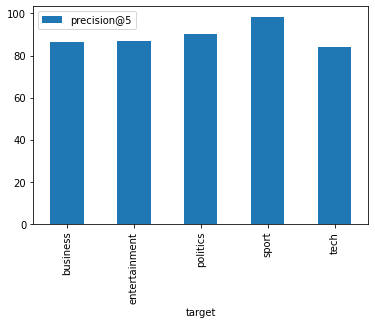

In [16]:
df_p5 = pd.DataFrame.from_dict(p5, orient='index', columns=['precision@5'])
df_p5["target"] =  ['business','entertainment','politics','sport','tech']
d = df_p5.set_index("target")
d.plot.bar()

Los resultados que obtenemos de precision@5 para las distintas clases varían en el rango de 84-98, siendo la clase con precision@5 más baja la de tecnología, y con la más alta la de sport, que se acerca a 99. Sabiendo que la precisión@X es la precisión a nivel de exhaustividad X, que nos dice de los X primeros documentos recuperados cuantos son de la clase deseada, la precision@5 media que obtenemos es buena. En el caso de la categoría sport, los resultados de precisión@5 son más altos porque los artículos de esta clase tendrán un vocabulario más específico, que interseca menos con los de otras categorías (esto se acentuará al usar word-embeddings en el siguiente apartado, también para la clase de entretenimiento). Sin embargo, obtenemos una precision@5 más baja para las categorías de tecnología y business, lo cual nos dice que se confunden más con otras categorías, pudiendo ser porque tienen más vocabulario en común.

## 3) Representación basada en word-embeddings y tf-idf

La segunda vectorización que vamos a usar representará los mensajes usando usando word-embeddings usando como pesos la frecuencia de aparición de cada palabra. Al igual que en el apartado anterior, usaremos monogramas y las _stop words_ que vienen configuradas por defecto para el inglés. Recuerda usar como vocabulario para vectorizar el vocabulario del fichero con las word-embeddings.

Aplica la vectorización a los conjuntos de mensajes de entrenamiento y test.

Calcula la precisión@5 de cada una de las clases usando como consultas los documentos de la partición de test y la similitud del coseno. Vamos a considerar que un documento recuperado es relevante cuando pertenezca a la misma clase que la consulta.

Dibuja los resultados en un diagrama de barras y compara los resultados con los del apartado anterior.

Procedemos como en la práctica anterior. Ante la ambiguedad del enunciado en cuanto a qué pesos hay que utilizar (si usar tf-idf como aparece en el título o la frecuencia de aparición de cada palabra que se indica en la explicación del apartado) vamos a utilizar la FRECUENCIA DE APARICIÓN DE CADA PALABRA como se nos pide en la explicación. 

In [17]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

In [18]:
glove_file = 'glove.6B.50d.txt'
model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

In [19]:
we_vocabulary = list(model.key_to_index.keys())
vectorizer_we = CountVectorizer(vocabulary = we_vocabulary, stop_words='english',binary = False)
X = vectorizer_we.fit_transform(train_n)

In [20]:
from scipy.sparse import find


def create_doc_embedding (doc_matrix_word_freq, keyedvectors):
    """
    create_doc_embedding creates a doc-embedding matrix where rows are the 
    documents and columns are the dimensions of the word-embedding. Each row r
    summarizes the vectors of the word-embeddings present in document r

    :param doc_matrix_word_freq: frequency matrix of the terms in each document
            It admits binary values, frequencies or weights.
            It admits the output of vectorizer.fit_transform
    :param keyedvectors: keyedvectors object from Gensim which has the 
            word-embedding information
    :return: returns the doc-embedding matrix that summarizes the 
             vector-embeddings of the words present in each document
    """ 

    
    num_docs, num_words= doc_matrix_word_freq.get_shape()

    # Creamos la matriz de documentos con tantas columnas como dimensiones tiene el we 
    doc_embed_matrix = np.zeros([num_docs,keyedvectors.vector_size])


    # Obtenemos los documentos
    docs, col, val = find(doc_matrix_word_freq)
    docs = np.unique(docs)

    # Para cada documento (esto se podrá hacer de forma más pythonica)
    for doc in docs:
      # Obtenemos las palabras presentes en el documento y su frecuencia
      row, words, frecs = find(doc_matrix_word_freq[doc,:])

      # Calculamos el vector medio para el documento
      # Para ello recuperamos los vectores del we presentes en el documento y 
      # los promediamos teniendo en cuenta su frecuencia
      count = 0
      for w,f in zip(words,frecs):
        doc_embed_matrix[doc,:] = doc_embed_matrix[doc,:] + (keyedvectors[w] * f)
        count = count +1
      doc_embed_matrix[doc,:] = doc_embed_matrix[doc,:]/count
    
      
    return doc_embed_matrix

In [21]:
doc_embed_matrix = create_doc_embedding(X,model)
# contiene un vector "embedding" para cada documento
doc_embed_matrix
Y=vectorizer_we.transform(test_n)
query_embed= create_doc_embedding(Y,model)

Una vez vectorizados aplicada la vectorización a los conjuntos de entrenamiento y test procedemos a calcular la precisión@5 para las distintas categorías. Además mostramos esta información en forma de gráfico de barras para su mejor comprensión.

In [22]:
stats = mean_precisions_per_class(doc_embed_matrix, train_target, query_embed, test_target, 5) 
stats

{'business': 90.93333333333334,
 'entertainment': 96.52173913043478,
 'politics': 93.21428571428571,
 'sport': 99.68253968253968,
 'tech': 93.44827586206897}

<AxesSubplot:xlabel='target'>

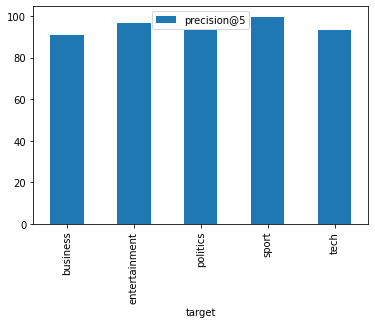

In [23]:
df_we = pd.DataFrame.from_dict(stats, orient='index', columns=['precision@5'])
df_we["target"] =  ['business','entertainment','politics','sport','tech']
d_we = df_we.set_index("target")
d_we.plot.bar()

Como vemos, la precision@5 media es superior al 90% en todas las clases . Cabe destacar que, comparado con el apartado anterior, donde la representación estaba basada en bolsas de palabras y tf-idf, en este caso los resultados son uniformemente mejores. Es decir, en todas las categorías la precision@5 aumenta respecto a la obtenida en el apartado anterior. Además, en el apartado anterior las precisiones@5 medias rondaban el 90% y ahora lo superan con holgura y se acercan más, por lo general, al 95%.

## 4) Análisis de errores

Vamos a investigar los resultados para entender mejor dónde están fallando los procesos de recuperación. Sigue los siguientes pasos.


1. Identifica la categoría de noticias donde la precisión media haya mejorado más al incorporar word-embeddings
2. Para dicha categoría, identifica la consulta donde la precisión haya mejorado más al usar word-embeddings
3. Muestra el texto original de la consulta y los términos que aparecen en las dos vectorizaciones tf-idf que usamos (recuerda que usamos diccionarios distintos para las vectorizaciones bolsa de palabras y word-embeddings).
4. Identifica las noticias recuperadas para dicha consulta para las dos aproximaciones y sus categorías (TF-IDF puro y con word-embeddings)
5. Muestra la intersección de términos entre la consulta y la primera noticia mal recuperada usando TF-IDF puro.
6. Muestra la intersección de términos entre la consulta y la última noticia bien recuperada usando word-embeddings.
7. A la luz de todo lo anterior, razona sobre por qué crees que el TF-IDF no fue capaz de clasificar bien la noticia y el word-embedding sí.


Puedes usar el código que calcula la intersección de términos que ponemos a continuación

In [24]:
def terms_in_message(feature_names,vector_data,index):
    '''
    Devuelve un conjunto los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    mensaje=vector_data[index,:]>0
    terminos_presentes = ma.array(feature_names, mask = ~(mensaje[0].toarray()))

    return set(terminos_presentes.compressed())

#### 1. Categoría de noticias donde la precisión media ha mejorado más al incorporar word-embeddings

Para este apartado, calculamos la media de mejora ha habido en cada categoría.

In [25]:
print('La mejora media de cada categoría es:\n', d_we - d)

La mejora media de cada categoría es:
                precision@5
target                    
business          4.266667
entertainment     9.565217
politics          2.857143
sport             1.269841
tech              9.310345


Puesto que hay dos categorías con prácticamente la misma mejora, vamos a ver si en alguna de ellas hay algún artículo con una mayor mejora. Para ello, definimos una función que nos devuelve la precisión por clase y consulta.

In [26]:
def precisions_per_class(X_train, y_train, X_test, y_test, k):
    '''Devuelve las precision@k para cada una de las clases.
    
    Parámetros:
    - X_train: documentos de entrenamiento vectorizados.
    - y_train: etiquetas de los documentos de entrenamiento.
    - X_test: documentos vectorizados que se usan como consultas
    - y_test: etiquetas de los documentos que se usan como consultas
    - k: número de documentos considerados a recuperar por la consulta
    
    Devuelve:
    - Diccionario clase -> precisión de cada artículo de la clase.
    '''
    
    # diccionario categoría -> lista de precisiones
    y_precisions = {y: [] for y in np.unique(y_test)}
    
    # Calcular precision@k para cada consulta
    for i in range(0, len(y_test)):
        x_query = X_test[i]
        y_query = y_test[i]
        idx = knn(x_query, X_train, k)
        y_selected = np.take(y_train, idx)
        precision = precision_at_k(y_selected, y_query, k)
        y_precisions[y_query].append((i, precision))
        
    return y_precisions

In [27]:
info_tf_idf = precisions_per_class(train_preprocessed, train_target, test_preprocessed, test_target, 5)
info_we = precisions_per_class(doc_embed_matrix, train_target, query_embed, test_target, 5)
mejora_tech = []
for i in range(0, len(info_we['tech'])):
    pre = info_tf_idf['tech'][i]
    post = info_we['tech'][i]
    mejora_tech.append([pre[0], post[1] - pre[1]])

mejora_entertainment = []
for i in range(0, len(info_we['entertainment'])):
    pre = info_tf_idf['entertainment'][i]
    post = info_we['entertainment'][i]
    mejora_entertainment.append([pre[0], post[1] - pre[1]])

In [28]:
from operator import itemgetter

# No es muy eficiente ordenar para obtener el máximo, pero habiendo pocos elementos no hay diferencia
print('La consulta que más ha mejorado de la categoría tech:',
      sorted(mejora_tech, key = itemgetter(1), reverse = True)[0], '\n')
print('La consulta que más ha mejorado de la categoría entertainment:',
      sorted(mejora_entertainment, key = itemgetter(1), reverse = True)[0])

La consulta que más ha mejorado de la categoría tech: [35, 80.0] 

La consulta que más ha mejorado de la categoría entertainment: [62, 60.0]


Por tanto, vamos a elegir la categoría 'tech', donde la noticia 35 ha mejorado su precisión un 80% (lo que significa que o bien ha pasado de 0 recuperaciones correctas a 4, o bien ha pasado de 1 recuperación correcta a 5).

#### 2 y 3. Consulta donde la precisión ha mejorado más al usar word-embeddings

Ya tenemos la consulta, es la número 35. La mostramos. Para ello necesitaremos la función que hemos creado para los vectores realizados con word-embeddings.

In [29]:
CONSULTA = 35

In [30]:
import numpy.ma as ma

def write_terms_we (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como word-embeddings.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    terminos = []
    msg = vector_data[index]
    for i in range(0,len(feature_names)):
        if msg[i] > 0:
            terminos.append(feature_names[i])
            
    terminos = sorted(terminos)
    
    # mostrar mensaje original
    if data is not None:
        print('Mensaje', index, ':', data[index])
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('\n','Mensaje', index, 'vectorizado por word-embeddings:', terminos,'\n')

In [31]:
print(write_terms(feature_names, test_n, test_vector_data, CONSULTA))
print(write_terms_we(we_vocabulary, None, Y.toarray(), CONSULTA))

Mensaje 35 : seamen sail into biometric future the luxury cruise liner crystal harmony  currently in the gulf of mexico  is the unlikely setting for tests of biometric technology.  as holidaymakers enjoy balmy breezes  their ship s crew is testing prototype versions of the world s first internationally issued biometric id cards  the seafarer s equivalent of a passport. along with the owner s picture  name and personal details  the new seafarers  identity document incorporates a barcode representing unique features of its holder s fingerprints. the cards are due to be issued in february next year  in line with the revised un convention on seafarers  identity documents of june 2003. tests currently under way in the caribbean are designed to ensure that new cards and their machine readers  produced by different companies in different countries  are working to interoperable standards. results of the current tests  which involve seafarers from a wide range of occupations and nationalities  

#### 4. Noticias recuperadas para la consulta para las dos aproximaciones y sus categorías

Calculamos las noticias recuperadas por ambas aproximaciones.

In [32]:
x_query_tf = test_preprocessed[CONSULTA]
y_query_tf = test_target[CONSULTA]
idx_tf = knn(x_query_tf, train_preprocessed, 5)
selected_tf = np.take(train_target, idx_tf)

x_query_we = query_embed[CONSULTA]
y_query_we = test_target[CONSULTA]
idx_we = knn(x_query_we, doc_embed_matrix, 5)
selected_we = np.take(train_target, idx_we)

print('Las noticias recuperadas por la bolsa de palabras son:', idx_tf)
print('Y sus categorías son:', selected_tf, '\n')
print('Las noticias recuperadas por el word-embeddings son:  ', idx_we)
print('Y sus categorías son:', selected_we)

Las noticias recuperadas por la bolsa de palabras son: [  63 1003  474 1164  492]
Y sus categorías son: ['politics' 'politics' 'politics' 'entertainment' 'tech'] 

Las noticias recuperadas por el word-embeddings son:   [ 398  840  934  604 1096]
Y sus categorías son: ['tech' 'tech' 'tech' 'tech' 'tech']


Podemos observar que la bolsa de palabras ha recuperado antes 3 noticias de política y una de entretenimiento antes que una de tecnología, mientras que el word-embeddings ha recuperado 5 de tecnología.

#### 5. Intersección de términos entre la consulta y la primera noticia mal recuperada usando TF-IDF puro

La primera noticia mal recuperada es la 63.

In [33]:
print('Las palabras en común entre la consulta y la noticia 63 usando TF-IDF puro son:')
terms_in_message(feature_names,test_vector_data,CONSULTA) & terms_in_message(feature_names,train_vector_data,63)

Las palabras en común entre la consulta y la noticia 63 usando TF-IDF puro son:


{'bbc',
 'cards',
 'details',
 'documents',
 'id',
 'identity',
 'issued',
 'new',
 'passport',
 'people',
 'programme',
 'said',
 'say',
 'says',
 'told'}

#### 6. Intersección de términos entre la consulta y la última noticia bien recuperada usando word-embeddings

Para esta sección hace falta comparar los términos dentro del diccionario de word-embeddings, así que necesitamos crear otra función.

In [34]:
def terms_in_message_we(feature_names,vector_data,index):
    '''
    Devuelve un conjunto los términos presentes en un mensaje representado como word-embeddings.
    
    - feature_names: terminos usados para vectorizar
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    terminos = []
    msg = vector_data[index,:]>0
    for i in range(0,len(feature_names)):
        if msg[i] > 0:
            terminos.append(feature_names[i])

    return set(terminos)

La última noticia bien recuperada es la 1096.

In [35]:
print('Las palabras en común entre la consulta y la noticia 1096 usando word-embeddings son:')
terms_in_message_we(we_vocabulary,Y.toarray(),CONSULTA) & terms_in_message_we(we_vocabulary,X.toarray(),1096)

Las palabras en común entre la consulta y la noticia 1096 usando word-embeddings son:


{'access',
 'companies',
 'countries',
 'current',
 'equivalent',
 'future',
 'new',
 'organisation',
 'people',
 'problems',
 'reduce',
 'said',
 'says',
 'technical',
 'technology',
 'use',
 'using',
 'way',
 'year'}

#### 7. Análisis

En primer lugar damos una idea general del tema del texto. La noticia trata sobre un nuevo sistema biométrico en pruebas que pretende servir para identificar a los marineros en distintos puertos del mundo. 

Lo primero que debe llamarnos la atención es la vectorización llevada a cabo. La vectorización con la aproximación tf-idf pura recoge menos palabras que la realizada por word-embeddings. Esto en principio no debería ser ni mejor ni peor. Ya hemos visto a lo largo de ambas prácticas que muchas palabras deben de ser descartadas por su falta de significado, como por ejemplo pronombres o determinantes. Sin embargo, en este caso las palabras que aparecen en la vectorización por word-embeddings y no en la tf-idf pura son 'barcode', 'biometric', 'biometrics', 'holydaymakers' y 'seafarers', entre otras. Si se lee el texto y después se reflexiona sobre cuáles son las dos palabras más importantes del texto quizás las que primero nos vengan a la cabeza son 'biometric'/'biometrics' y 'seafarers'. Que la vectorización tf-idf prescinda de estas palabras antes de empezar es sin duda un gran inconveniente. Si recordamos, la vectorización tf-idf la hicimos con CountVectorizer y el vocabulario que tomaba era el inferido de los propios textos de entrenamiento. Es decir, no existe ningún texto en el conjunto de entrenamiento que contenga 'biometric' o 'biometrics' (añadimos un código en la siguiente celda que lo comprueba, recomendamos no volver a ejecutarlo ya que lleva un rato). Como es lógico, esto nos dificulta encontrar textos que traten el mismo tema. Por otro lado, la vectorización de las word-embeddings se hace con las palabras que existen en las word-embeddings y tenemos la suerte de que los ejemplos citados sí están recogidos en ese vocabulario, ya que aunque no vayamos a recuperar textos del mismo tema (pues no existen), que el word-embeddings agrupe por conceptos nos permite tener en cuenta al menos la palabra de alguna manera y recuperar textos de temas similares, que serán más propensos a ser de tecnología.

In [42]:
from IPython.display import clear_output

indexes = []
for index in range(0, len(list(train_vector_data))):
    terminos = []
    
    # máscara para seleccionar sólo el mensaje en posición index
    mask=train_vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    for i in range(0, len(terminos)):
        if terminos[i] == 'biometric' or terminos[i] == 'biometric':
            indexes.append([index, terminos[i]])
    clear_output(wait=False)
    print(index + 1, "documentos de entrenamiento analizados.")
if len(indexes) == 0:
    print("No se ha encontrado ningun documento en el conjunto de entrenamiento que contenga biometric o biometrics.")
else:
    for i in range(0, len(indexes)):
        print("El mensaje", indexes[i][0], "contiene la palabra", indexes[i][1], ".")

1192 documentos de entrenamiento analizados.
No se ha encontrado ningun documento en el conjunto de entrenamiento que contenga biometric o biometrics.


A continuación atendemos a las palabras comunes en los textos. En primer lugar, el primer texto mal recuperado por tfidf es el 63 cuyas palabras comunes con la consulta están relacionadas con papeles, identificaciones y pasaportes. Es lógico que al contener este vocabulario el texto recuperdo pueda ser de política. En cambio, las palabras comunes de la consulta con el último documento bien recuperado con word-embeddigs tienen relación con tecnología, nuevo o futuro y también es normal que, con este vocabulario, el texto recuperado sea de tecnología. Queremos destacar que la palabra 'new' aparece en los tres documentos: la consulta y los dos documentos recuperados. Esta palabra nos va a servir para ejemplificar la diferencia entre word-embeddings y tf-idf. Mientras que en tf-idf es muy relevante que las palabras que aparezcan en los documentos sean exactamente las mismas, esto no sucede en con word-embeddings. Para que quede más claro, no es relevante que una palabra aparezca literalmente en el documento recuperado con word-embeddings y en la consulta. Es suficiente con que aparezca un sinónimo o una palabra suficientemente cerca semánticamente hablando. Además, y volviendo al ejemplo de 'new', esta palabra no representa lo mismo vista desde la aproximación word-embeddings que vista desde tf-idf. Mientras que en la primera, estará semánticamente cerca de futuro, tecnología o avance, en tf-idf únicamente importa el número de apariciones relativo y los documentos en los que aparece, que por ser una palabra común serán muchos. Dicho de otra forma, para tf-idf le es indiferente cambiar la palabra 'new' por 'latest' que por 'pepito' en el sentido de que todos los textos que estuvieran cerca de la consulta porque tenían la palabra 'new' en común ahora se habrán alejado en igual medida. Sin embargo, a word-embeddings le dará exactamente igual que 'instancia del concepto' se tome.

Esto nos debe hacer reflexionar sobre las limitaciones de la aproximación tf-idf y las demás aproximaciones de bolsa de palabras. Lo que cuenta en estos casos no es el verdadero significado, sino simplemente el número de repeticiones y apariciones de la palabra.

Por último queremos compartir un pequeño experimento realizado para reflexionar sobre si le estamos pidiendo demasiado a nuestro recomendador. Con la intención de leer la noticia en un formato de texto más atractivo a la vista que el texto plano, buscamos la noticia de consulta en la página de la BBC y, como los datos con los que trabajábamos son reales y sacados de la BBC, no tardamos mucho en encontrarla. Al finalizar la lectura de la noticia, aparecían otras 5 noticias que se nos recomendaba leer tras haber visto esta (¡Qué casualidad, lo mismo que estamos haciendo nosotros!). Los títulos y temáticas de las noticias, por orden de aparición, eran los siguientes:

- Testing the biometric facts (Technology)
- Id cards in other contries (Politics)
- Id card technology trial launched (Politics)
- 'I've got a biometric ID card' (UK)
- Facing a biometric future (Technology)

Como se puede ver, los documentos recuperados por el propio recomendador de la BBC tratan sobre dos temas fundamentales: id cards y biometric. Si recordamos, nuestra noticia utilizada como consulta trataba principalmente estos dos temas. Sin embargo, de los documentos recuperados por el recomendador de la BBC, dos de ellos (los relacionados con las tarjetas de identificación) están recogidos en el tema de política. El recomendador de la BBC no parece tener como prioridad que los textos recuperados sean todos ellos del mismo tema que la noticia consulta. Como el recomendador de la BBC conoce el tema de cada noticia no le sería difícil recomendar otras 5 noticias del tema de tecnología. Pero recordando lo aprendido sobre recomendadores en el primer cuatrimestre, de un recomendador se espera, a demás de recuperar documentos similares, cierta heterogeneidad.

Sin embargo, estamos haciendo una pequeña trampa: no es lo mismo un recomendador que un recuperador de información. Mientras que de un recomendador se espera cierta variedad dentro de un mismo tema común, este no es el caso de los recuperadores de información. Estos pretenden recuperar documentos relevantes a una consulta, ignorando en cierto modo la falta de heterogeneidad.

A pesar de esto, recuperadores y recomendadores tienen un objetivo más o menos común y sacando ideas de los segundos para aplicarlas en los primeros, quizás sea muy estricto el criterio de relevancia de un documento. Es decir, que un documento sea relevante únicamente cuando es de la misma categoría que la consulta.

A modo de resumen, podemos concluir que para el caso particular de querer recuperadores de información, tanto el tf-idf puro como el word-embeddings son bastante buenos en general. Sin embargo, hemos comprobado que al no ser nuestra base de datos (el conjunto de entrenamiento) demasiado grande, si se nos consulta por un documento que trate un tema nuevo, word-embeddings hace un mucho mejor trabajo que tf-idf puro. Sería interesante realizar el mismo análisis si tuviéramos más documentos entre los que poder elegir para recuperar.